# The setup

* Customers have rated two products on a scale of 1 to 10.
* You want to test for a significant difference in the average rating.
   * Is this possible, given the data?
   
# The data

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read
df = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/test-for-normality-drill.csv"
)

<IPython.core.display.Javascript object>

In [7]:
# Inspect the data/data types
df.shape

(848, 2)

<IPython.core.display.Javascript object>

In [8]:
df.head()

,rating,product
0,1,2
1,1,2
2,1,1
3,1,1
4,1,1


<IPython.core.display.Javascript object>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 2 columns):
rating     848 non-null int64
product    848 non-null int64
dtypes: int64(2)
memory usage: 13.4 KB


<IPython.core.display.Javascript object>

In [12]:
df.isna().sum()

rating     0
product    0
dtype: int64

<IPython.core.display.Javascript object>

# Checking assumptions

## List of t-test assumptions

* The test variable (i.e. the variable we are comparing averages for) is continuous.
* There is no relationship between items (i.e. the measurement of one observation does not affect the measurement of another.  For example, don't use a t-test to check if the mean of a coins diameter is significantly different from the mean of a coin's radius.)
* Samples are drawn at random for each population. In the next checkpoint we will get into how to randomly sample; for now, just assume that it is.
* The test variable’s samples and populations are approximately normally distributed. This is the assumption of primary interest for this checkpoint.

### Are we independent?

Here, we're just going to assume that we are

### Are we random?

Here, we're just going to assume that we are

### Are we continuous?

In [16]:
type(df["rating"])

pandas.core.series.Series

<IPython.core.display.Javascript object>

In [14]:
set(df["rating"])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

<IPython.core.display.Javascript object>

In [15]:
df["rating"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<IPython.core.display.Javascript object>

In [17]:
df["rating"].value_counts()

5     144
6     128
4     128
7      96
3      96
8      64
2      64
9      48
10     40
1      40
Name: rating, dtype: int64

<IPython.core.display.Javascript object>

...we aren't continuous...  time to bring up that our assumptions are kinda fungible ¯\\_(ツ)_/¯

In other words, the t-test is fairly 'robust', and this is generally given a disclaimer of having a 'reasonably large' sample size (often shown as $n \geq 30$).

Rank data like this isn't continuous and technically isn't normal either. We'll see some alternative ways to test without the normality assumption.  One of these alternatives is a *Mann-Whitney* which doesn't assume a normal or continuous distribtion.

There is a lot of discussion about when to which test and the practical implications.

* [Independent t-test for two samples](https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php)

> However, the t-test is described as a robust test with respect to the assumption of normality. This means that some deviation away from normality does not have a large influence on Type I error rates.

* [Two-sample t-test and robustness](https://www.johndcook.com/blog/2018/05/11/two-sample-t-test/)

> That is, the [t-test] test works more or less as advertised as long as the distribution is symmetric like a normal distribution, but it may not work as expected if the distribution is asymmetric.

* [Best Way to Analyze Likert Item Data: Two Sample T-Test versus Mann-Whitney](https://blog.minitab.com/blog/adventures-in-statistics-2/best-way-to-analyze-likert-item-data-two-sample-t-test-versus-mann-whitney)

### Are we normal?

To check this we can use different types of plots and measures such as skewness and kurtosis.

First, let's visualize:

In [18]:
df.head()

,rating,product
0,1,2
1,1,2
2,1,1
3,1,1
4,1,1


<IPython.core.display.Javascript object>

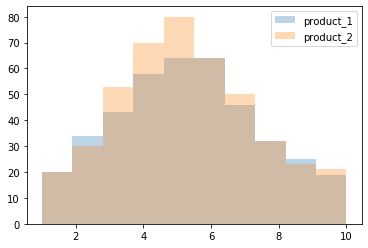

<IPython.core.display.Javascript object>

In [28]:
# Subset to separate products
product_1 = df[df["product"] == 1]
product_2 = df[df["product"] == 2]

# Viz overlaid histograms
plt.hist(product_1["rating"], alpha=0.3, label="product_1")
plt.hist(product_2["rating"], alpha=0.3, label="product_2")
plt.legend(loc="upper right")
plt.show()

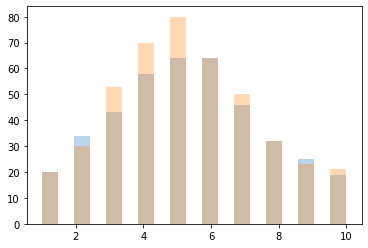

<IPython.core.display.Javascript object>

In [22]:
# Viz overlaid histograms with bins chosen to highlight discrete dist
plt.hist(product_1["rating"], alpha=0.3, bins=19)
plt.hist(product_2["rating"], alpha=0.3, bins=19)
plt.show()

Now, let's look at skewness and kurtosis:

In [29]:
# from scipy import stats
# import scipy.stats as stats
prod_1_desc = stats.describe(product_1["rating"])
prod_2_desc = stats.describe(product_2["rating"])

print(prod_1_desc)
print(prod_2_desc)

DescribeResult(nobs=405, minmax=(1, 10), mean=5.298765432098765, variance=5.521904412663488, skewness=0.1261899414498835, kurtosis=-0.6970087606916238)
DescribeResult(nobs=443, minmax=(1, 10), mean=5.250564334085778, variance=5.179156920625517, skewness=0.2139333145980557, kurtosis=-0.5520819611532364)


<IPython.core.display.Javascript object>

In [35]:
pd.DataFrame([prod_1_desc])

,nobs,minmax,mean,variance,skewness,kurtosis
0,405,"(1, 10)",5.298765,5.521904,0.12619,-0.697009


<IPython.core.display.Javascript object>

In my opinion, looking at the `DescribeResult(...)` output isn't the easiest.  Let's write a function to convert the output to a `pandas.DataFrame` for display.  This will also allow us to more easily use some plotting functions for comparison.

In [41]:
def format_description(description, name="description"):
    """Cast scipy.stats.describe output to df"""
    # Convert scipy.stats.describe output to a dataframe
    df = pd.DataFrame([description])

    # Add a name column to the dataframe
    df["name"] = name

    return df


format_description(prod_1_desc, "prod_1_rating")

,nobs,minmax,mean,variance,skewness,kurtosis,name
0,405,"(1, 10)",5.298765,5.521904,0.12619,-0.697009,prod_1_rating


<IPython.core.display.Javascript object>

In [42]:
format_description(prod_2_desc, "prod_2_rating")

,nobs,minmax,mean,variance,skewness,kurtosis,name
0,443,"(1, 10)",5.250564,5.179157,0.213933,-0.552082,prod_2_rating


<IPython.core.display.Javascript object>

We can use `pandas.concat([df1, df2, ..., dfn])` to stack data frames (similarly to `UNION ALL` from SQL).

In [44]:
prod_1_desc_df = format_description(prod_1_desc, "prod_1_rating")
prod_2_desc_df = format_description(prod_2_desc, "prod_2_rating")

# Use pd.concat to stack 2 scipy.stats.describe dataframes
description_df = pd.concat([prod_1_desc_df, prod_2_desc_df])
description_df

,nobs,minmax,mean,variance,skewness,kurtosis,name
0,405,"(1, 10)",5.298765,5.521904,0.126190,-0.697009,prod_1_rating
0,443,"(1, 10)",5.250564,5.179157,0.213933,-0.552082,prod_2_rating


<IPython.core.display.Javascript object>

Let's compare our samples' to some samples from known distributions.  We'll compare visually and across our descriptive statistics of interest.

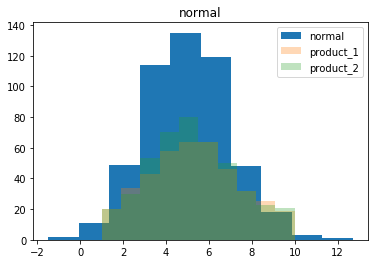

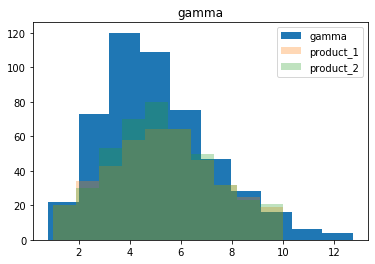

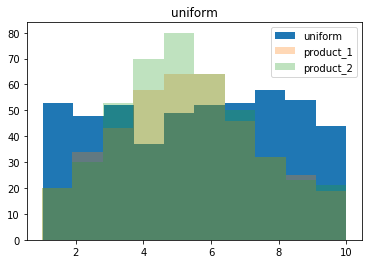

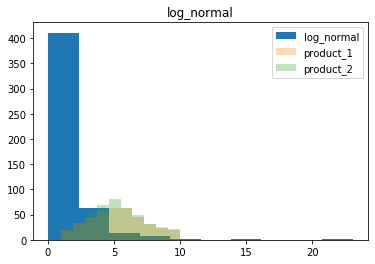

,nobs,minmax,mean,variance,skewness,kurtosis,name
0,405,"(1, 10)",5.298765,5.521904,0.126190,-0.697009,prod_1_rating
1,443,"(1, 10)",5.250564,5.179157,0.213933,-0.552082,prod_2_rating
2,500,"(-1.4825346801381452, 12.705462981309442)",5.013676,3.851432,0.179623,0.256381,normal
3,500,"(0.8215640329016687, 12.725321929903371)",5.062087,4.773801,0.757112,0.449211,gamma
4,500,"(1.0289643724385082, 9.985127602536547)",5.548099,6.672517,-0.067589,-1.211579,uniform
5,500,"(0.04882503156042033, 23.051907794157056)",1.556586,3.888054,4.879461,37.634789,log_normal


<IPython.core.display.Javascript object>

In [49]:
np.random.seed(42)

sample_size = 500
samples = {}

# Add random samples to our dictionary
samples["normal"] = np.random.normal(5, 2, sample_size)
samples["gamma"] = np.random.gamma(5, 1, sample_size)
samples["uniform"] = np.random.uniform(1, 10, sample_size)
samples["log_normal"] = np.random.lognormal(0, 1, sample_size)

# Starting with an empty list and building up the output later
description_dfs = []

# Add description dfs for our 2 product rating samples
description_dfs.extend([prod_1_desc_df, prod_2_desc_df])


for name, sample in samples.items():
    # Describe and store
    desc = stats.describe(sample)
    description_df = format_description(desc, name)

    # Add the new description to the end of the list
    description_dfs.append(description_df)

    # Viz
    plt.hist(sample, label=name)
    plt.hist(product_1["rating"], alpha=0.3, label="product_1")
    plt.hist(product_2["rating"], alpha=0.3, label="product_2")
    plt.legend()
    plt.title(name)
    plt.show()


description_df = pd.concat(description_dfs, ignore_index=True)
description_df

For checking our normality assumption we'll focus in on skewness and kurtosis.

From the reading:
> How close is close enough? The truth is there’s no definitive answer, but a good rule of thumb is that anything with kurtosis from -2.5 to 2.5 and skewness from -1.5 to 1.5 is close enough for a t-test to work well.

Seeing this plotted makes it easier to see that our data is fairly in line with the normal sample's descriptive statistics.

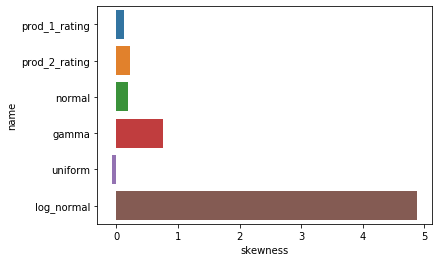

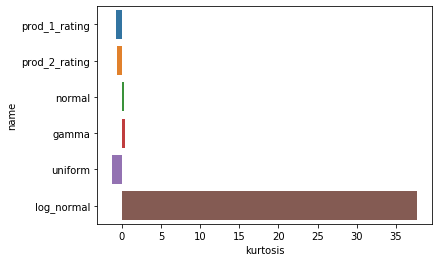

<IPython.core.display.Javascript object>

In [55]:
# Make a bar plot of skewness by name using seaborn
sns.barplot(x="skewness", y="name", data=description_df)
plt.show()

# Make a bar plot of skewness by name using seaborn
sns.barplot(x="kurtosis", y="name", data=description_df)
# sns.barplot(x=description_df["kurtosis"], y=description_df["name"])
plt.show()

# Let's perform the t-test...

## First, what are our hypotheses?

H<sub>o</sub>: `mean(x1) - mean(x2) = 0`

H<sub>a</sub>: `mean(x1) - mean(x2) != 0`

## By 'hand' t-test

### Define t

* Intuitively, a t-test is the ratio of signal to noise: `t = signal / noise`
* The signal we want to measure is the difference of means `signal = x1.mean() - x2.mean()`
* The noise... `np.sqrt(x1.std()**2 / len(x1) + x2.std()**2 / len(x2))`
  * From the reading: 
      > our denominator is a "pooled" combination of the variances of each sample... a "hybrid" standard error"
  * SE for a single sample is defined as `x.std() / np.sqrt(len(x))`
  
### All together now

In [56]:
x1 = product_1["rating"]
x2 = product_2["rating"]

signal = x1.mean() - x2.mean()
noise = np.sqrt(x1.std() ** 2 / len(x1) + x2.std() ** 2 / len(x2))

t = signal / noise

print(f"The difference in means is {signal:.4f}")
print(f"Our test statistic is {t:.3f}.")

The difference in means is 0.0482
Our test statistic is 0.303.


<IPython.core.display.Javascript object>

#### As a function

In [57]:
def t_test(x1, x2):
    """2 sample t-test for 2 1d numpy arrays"""
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.std() ** 2 / len(x1) + x2.std() ** 2 / len(x2))
    t = signal / noise
    return t


test_statistic = t_test(product_1["rating"], product_2["rating"])
print(f"Our test statistic is {test_statistic:.3f}.")

Our test statistic is 0.303.


<IPython.core.display.Javascript object>

### Conclusions?

From the reading:
> We know we can reject the null from either of these results:
> 
> * The test statistic is greater than 1.96.
> * The p-value is less than < .05.

Note that the critical value (i.e. 1.96) varies and if doing this "by hand" we could use [a table](https://people.richland.edu/james/lecture/m170/tbl-t.html) to look up an appropriate value.  The other option is to use a function that does this for us.

In [58]:
# Drumroll.......
test_statistic > 1.96

False

<IPython.core.display.Javascript object>

We fail to reject the null hypothesis.

## Now using `scipy.stats.ttest_ind()`

In [59]:
# View the documentation for the function
stats.ttest_ind?

<IPython.core.display.Javascript object>

In [60]:
stats.ttest_ind(product_1["rating"], product_2["rating"])

Ttest_indResult(statistic=0.30332106983071794, pvalue=0.7617197649549227)

<IPython.core.display.Javascript object>

In [61]:
test_statistic, p_value = stats.ttest_ind(product_1["rating"], product_2["rating"])

print(f"Our test statistic is {test_statistic:.3f}.")
print(f"Our p value is {p_value:.3f}.")

Our test statistic is 0.303.
Our p value is 0.762.


<IPython.core.display.Javascript object>

In [63]:
print(test_statistic > 1.96)
print(p_value < 0.05)

False
False


<IPython.core.display.Javascript object>

### Interpreting the p value

#### Generally: 

Assuming H<sub>o</sub> is true, you would obtain the observed difference of means (or greater) in `{p_value * 100}`% of samples due to random error.

#### In our case:

In [64]:
signal = product_1["rating"].mean() - product_2["rating"].mean()

part_1 = (
    "Assuming there is no difference of means, we would see the observed difference "
)
part_2 = f"of {signal:.4f} (or greater) in {p_value * 100:.1f}% of samples due to random error"
print(part_1 + part_2)

Assuming there is no difference of means, we would see the observed difference of 0.0482 (or greater) in 76.2% of samples due to random error


<IPython.core.display.Javascript object>

### Confidence Interval

Slightly re-written from the function in the reading.  Neither is wrong, and they calculate the same results; just different writing styles.  We'll get to this later...

In [ ]:
def get_95_ci(x1, x2):
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.std()**2 / len(x1) + x2.std()**2 / len(x2))

    ci_lower_bound = signal - 1.96 * noise
    ci_upper_bound = signal + 1.96 * noise

    return (ci_lower_bound, ci_upper_bound)


ci_lo, ci_hi = get_95_ci(product_1['rating'], product_2['rating'])
print((ci_lo, ci_hi))

# Is zero (aka our null hypothesis) contained in CI?
ci_lo <= 0 <= ci_hi